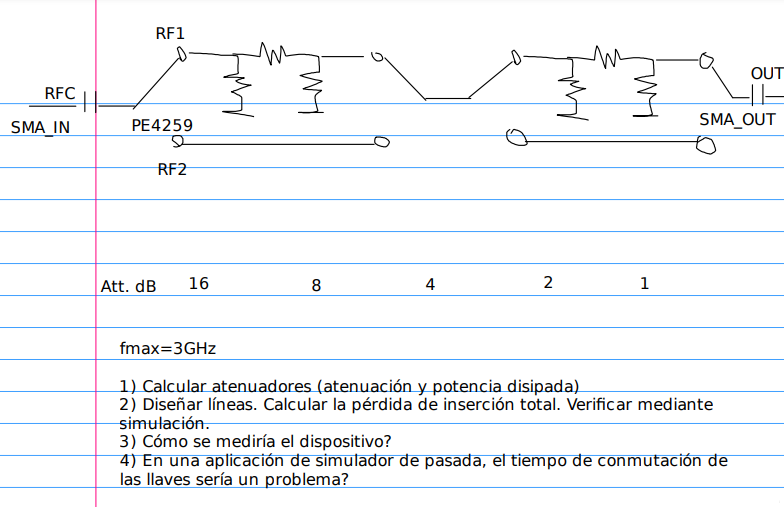

La idea es diseñar un atenuador variable mediante llaves. 

Una forma de hacerlo es diseñar varios atenuadores en serie conectados mediante llaves para agregar/quitar atenuadores a la cadena y asi cambiar la atenuacion

En este caso, se pueden usea 5 atenuadores en serie.

Entonces quedarian:
- Att A: 16 dB
- Att B:  8 dB
- Att C:  4 dB
- Att D:  2 dB
- Att E:  1 dB

Si:

- XdB = Power Loss
- Nx = Voltage Ratio = Vin/Vout
- Px = Power Ratio = Pin/Pout

Entonces:

XdB = 20 log (Vin/Vout) = 20 log (Nx) = 10 log (Pin/Pout) = 10 log (Px)



In [152]:
ATT_A = 16 
ATT_B =  8 
ATT_C =  4 
ATT_D =  2 
ATT_E =  1 

def calculate_voltage_ratio(power_loss):
    return round(10**(power_loss / 20), 3)


In [154]:
Na = calculate_voltage_ratio(ATT_A)
Nb = calculate_voltage_ratio(ATT_B)
Nc = calculate_voltage_ratio(ATT_C)
Nd = calculate_voltage_ratio(ATT_D)
Ne = calculate_voltage_ratio(ATT_E)

print(f"ATT A: XdB = {ATT_A} , Nx = {Na}")
print(f"ATT A: XdB = {ATT_B} , Nx = {Nb}")
print(f"ATT A: XdB = {ATT_C} , Nx = {Nc}")
print(f"ATT A: XdB = {ATT_D} , Nx = {Nd}")
print(f"ATT A: XdB = {ATT_E} , Nx = {Ne}")


ATT A: XdB = 16 , Nx = 6.31
ATT A: XdB = 8 , Nx = 2.512
ATT A: XdB = 4 , Nx = 1.585
ATT A: XdB = 2 , Nx = 1.259
ATT A: XdB = 1 , Nx = 1.122


Se asume que Zin = Zout = 50 ohms

![Alt text](image-1.png)

Entonces:
R1 = R2 = 50 * ( (Nx + 1) / (Nx - 1) )
Rs = 50 * ( (Nx^2 -1) / 2Nx )

In [155]:
def calculate_R1(N):
    return round(50*((N + 1)/ (N - 1)), 3)

calculate_R2 = calculate_R1

def calculate_Rs(N):
    return round(50*((N**2 - 1) / (2*N)), 3)


Calculo los valores de resistencias para cada atenuador

In [157]:

print("Atenuador A - 16dB:")
R1_A = calculate_R1(Na)
R2_A = calculate_R2(Na)
Rs_A = calculate_Rs(Na)

print(f'R1 = R2 = {R1_A},  Rs = {Rs_A}')
print('____________________________')

print("Atenuador B - 8dB:")
R1_B = calculate_R1(Nb)
R2_B = calculate_R2(Nb)
Rs_B = calculate_Rs(Nb)
print(f'R1 = R2 = {R1_B},  Rs = {Rs_B}')
print('____________________________')

print("Atenuador C - 4dB:")
R1_C = calculate_R1(Nc)
R2_C = calculate_R2(Nc)
Rs_C = calculate_Rs(Nc)
print(f'R1 = R2 = {R1_C},  Rs = {Rs_C}')
print('____________________________')

print("Atenuador D - 2dB:")
R1_D = calculate_R1(Nd)
R2_D = calculate_R2(Nd)
Rs_D = calculate_Rs(Nd)
print(f'R1 = R2 = {R1_D},  Rs = {Rs_D}')
print('____________________________')

print("Atenuador E - 1dB:")
R1_E = calculate_R1(Ne)
R2_E = calculate_R2(Ne)
Rs_E = calculate_Rs(Ne)
print(f'R1 = R2 = {R1_E},  Rs = {Rs_E}')
print('____________________________')


Atenuador A - 16dB:
R1 = R2 = 68.832,  Rs = 153.788
____________________________
Atenuador B - 8dB:
R1 = R2 = 116.138,  Rs = 52.848
____________________________
Atenuador C - 4dB:
R1 = R2 = 220.94,  Rs = 23.852
____________________________
Atenuador D - 2dB:
R1 = R2 = 436.1,  Rs = 11.618
____________________________
Atenuador E - 1dB:
R1 = R2 = 869.672,  Rs = 5.768
____________________________


In [158]:
standard_resistor_values_1percent = [10.0,	10.2,	10.5,	10.7,	11.0,	11.3,	11.5,	11.8,	12.1,	12.4,	12.7,	13.0, 13.3,	13.7,	14.0,	14.3,	14.7,	15.0,	15.4,	15.8,	16.2,	16.5,	16.9,	17.4, 17.8,	18.2,	18.7,	19.1,	19.6,	20.0,	20.5,	21.0,	21.5,	22.1,	22.6,	23.2, 23.7,	24.3,	24.9,	25.5,	26.1,	26.7,	27.4,	28.0,	28.7,	29.4,	30.1,	30.9,  31.6,	32.4,	33.2,	34.0,	34.8,	35.7,	36.5,	37.4,	38.3,	39.2,	40.2,	41.2, 42.2,	43.2,	44.2,	45.3,	46.4,	47.5,	48.7,	49.9,	51.1,	52.3,	53.6,	54.9, 56.2,	57.6,	59.0,	60.4,	61.9,	63.4,	64.9,	66.5,	68.1,	69.8,	71.5,	73.2, 75.0,	76.8,	78.7,	80.6,	82.5,	84.5,	86.6,	88.7,	90.9,	93.1,	95.3,	97.6]
decade_multiplier = [1, 10 , 100, 1e3, 10e3]

comercial_resistor_list = [resistor_value * multiplier for resistor_value in standard_resistor_values_1percent for multiplier in decade_multiplier]

print(all_posible_values)


[10.0, 100.0, 1000.0, 10000.0, 100000.0, 10.2, 102.0, 1019.9999999999999, 10200.0, 102000.0, 10.5, 105.0, 1050.0, 10500.0, 105000.0, 10.7, 107.0, 1070.0, 10700.0, 107000.0, 11.0, 110.0, 1100.0, 11000.0, 110000.0, 11.3, 113.0, 1130.0, 11300.0, 113000.0, 11.5, 115.0, 1150.0, 11500.0, 115000.0, 11.8, 118.0, 1180.0, 11800.0, 118000.0, 12.1, 121.0, 1210.0, 12100.0, 121000.0, 12.4, 124.0, 1240.0, 12400.0, 124000.0, 12.7, 127.0, 1270.0, 12700.0, 127000.0, 13.0, 130.0, 1300.0, 13000.0, 130000.0, 13.3, 133.0, 1330.0, 13300.0, 133000.0, 13.7, 137.0, 1370.0, 13700.0, 137000.0, 14.0, 140.0, 1400.0, 14000.0, 140000.0, 14.3, 143.0, 1430.0, 14300.0, 143000.0, 14.7, 147.0, 1470.0, 14700.0, 147000.0, 15.0, 150.0, 1500.0, 15000.0, 150000.0, 15.4, 154.0, 1540.0, 15400.0, 154000.0, 15.8, 158.0, 1580.0, 15800.0, 158000.0, 16.2, 162.0, 1620.0, 16200.0, 162000.0, 16.5, 165.0, 1650.0, 16500.0, 165000.0, 16.9, 169.0, 1689.9999999999998, 16900.0, 169000.0, 17.4, 174.0, 1739.9999999999998, 17400.0, 174000.0, 17.

In [159]:
def find_commercial_value(att_resistor):
    closest_resistor = min(comercial_resistor_list, key=lambda x: abs(x - att_resistor))
    return closest_resistor

In [185]:
print("Atenuador A - 16dB:")
R2_A_C = R1_A_C= find_commercial_value(R1_A )
Rs_A_C= find_commercial_value(Rs_A)

if  abs((R1_A - R1_A_C)/ R1_A_C)  < 0.02:
    print("Existe un valor Comercial para R1 y R2!") 
    print(f'R1 = R2 = {R1_A_C}')
else: 
    print(f"El valor comercial mas cercano para R1 y R2 ({R1_A_C}) difiere en mas de un 2% ")

if  abs((Rs_A - Rs_A_C)/ Rs_A_C)  < 0.02:
    print("Existe un valor Comercial para RS!") 
    print(f'RS = {Rs_A_C}')
else: 
    print(f"El valor comercial mas cercano para Rs ({Rs_A_C}) difiere en mas de un 2% ")

print('__________________________________________________________________________')

print("Atenuador B - 8dB:")
R2_B_C = R1_B_C= find_commercial_value(R1_B )
Rs_B_C= find_commercial_value(Rs_B)

if  abs((R1_B - R1_B_C)/ R1_B_C)  < 0.02:
    print("Existe un valor Comercial para R1 y R2!") 
    print(f'R1 = R2 = {R1_B_C}')
else: 
    print(f"El valor comercial mas cercano para R1 y R2 ({R1_B_C}) difiere en mas de un 2% ")

if  abs((Rs_B - Rs_B_C)/ Rs_B_C)  < 0.02:
    print("Existe un valor Comercial para RS!") 
    print(f'RS = {Rs_B_C}')
else: 
    print(f"El valor comercial mas cercano para Rs ({Rs_B_C}) difiere en mas de un 2% ")

print('__________________________________________________________________________')

print("Atenuador C - 4dB:")
R2_C_C = R1_C_C= find_commercial_value(R1_C )
Rs_C_C= find_commercial_value(Rs_C)

if  abs((R1_C - R1_C_C)/ R1_C_C)  < 0.02:
    print("Existe un valor Comercial para R1 y R2!") 
    print(f'R1 = R2 = {R1_C_C}')
else: 
    print(f"El valor comercial mas cercano para R1 y R2 ({R1_C_C}) difiere en mas de un 2% ")

if  abs((Rs_C - Rs_C_C)/ Rs_C_C)  < 0.02:
    print("Existe un valor Comercial para RS!") 
    print(f'RS = {Rs_C_C}')
else: 
    print(f"El valor comercial mas cercano para Rs ({Rs_C_C}) difiere en mas de un 2% ")

print('__________________________________________________________________________')

print("Atenuador D - 2dB:")
R2_D_C = R1_D_C= find_commercial_value(R1_D )
Rs_D_C= find_commercial_value(Rs_D)

if  abs((R1_D - R1_D_C)/ R1_D_C)  < 0.02:
    print("Existe un valor Comercial para R1 y R2!") 
    print(f'R1 = R2 = {R1_D_C}')
else: 
    print(f"El valor comercial mas cercano para R1 y R2 ({R1_D_C}) difiere en mas de un 2% ")

if  abs((Rs_D - Rs_D_C)/ Rs_D_C)  < 0.02:
    print("Existe un valor Comercial para RS!") 
    print(f'RS = {Rs_D_C}')
else: 
    print(f"El valor comercial mas cercano para Rs ({Rs_D_C}) difiere en mas de un 2% ")

print('__________________________________________________________________________')

print("Atenuador E - 1dB:")
R2_E_C = R1_E_C= find_commercial_value(R1_E )
Rs_E_C= find_commercial_value(Rs_E)

if  abs((R1_E - R1_E_C)/ R1_E_C)  < 0.02:
    print("Existe un valor Comercial para R1 y R2!") 
    print(f'R1 = R2 = {R1_E_C}')
else: 
    print(f"El valor comercial mas cercano para R1 y R2 ({R1_E_C}) difiere en mas de un 2% ")

if  abs((Rs_E - Rs_E_C)/ Rs_E_C)  < 0.02:
    print("Existe un valor Comercial para RS!") 
    print(f'RS = {Rs_E_C}')
else: 
    print(f"El valor comercial mas cercano para Rs ({Rs_E_C}) difiere en mas de un 2% ")

print('__________________________________________________________________________')

Atenuador A - 16dB:
Existe un valor Comercial para R1 y R2!
R1 = R2 = 68.1
Existe un valor Comercial para RS!
RS = 154.0
__________________________________________________________________________
Atenuador B - 8dB:
Existe un valor Comercial para R1 y R2!
R1 = R2 = 115.0
Existe un valor Comercial para RS!
RS = 52.3
__________________________________________________________________________
Atenuador C - 4dB:
Existe un valor Comercial para R1 y R2!
R1 = R2 = 221.0
Existe un valor Comercial para RS!
RS = 23.7
__________________________________________________________________________
Atenuador D - 2dB:
Existe un valor Comercial para R1 y R2!
R1 = R2 = 432.0
Existe un valor Comercial para RS!
RS = 11.5
__________________________________________________________________________
Atenuador E - 1dB:
Existe un valor Comercial para R1 y R2!
R1 = R2 = 866.0
El valor comercial mas cercano para Rs (10.0) difiere en mas de un 2% 
_________________________________________________________________________

En el unico caso que el valor comercial difiere en mas de un 5% del valor obtenido es el Atenuador E.
En este caso, el Valor obteniado para Rs = 5.78 y el comercial mas cercano es Rs_c = 10

En este caso se puede utilizar dos resisentcias de 11.5 en paralelo.



In [186]:
Rs_E_C = (11.5 * 11.5)/ (11.5+11.5)
print(Rs_E_C)


5.75


Se calcula entonces la potencia que se disipará en cada resistencia asumiendo que la Potencia de entrada = 20dBm

In [161]:
import numpy as np 

def calculate_power_on_resistors(R1, R2, Rs, Pin_dBm = 20):
    Pin_W = (10**(Pin_dBm/10))/1000
    Vin_rms = np.sqrt(50*Pin_W)
    PR1 = round((Vin_rms**2)/R1, 3)
    PR2 = round(((Vin_rms*(R2/(Rs+R2)))**2)/R2 , 3)
    PRs = round((Vin_rms*(1-(R2/(Rs+R2)))**2)/Rs, 3)
    return PR1, PR2, PRs


In [187]:
print("Atenuador A - 16dB:")
PR1_A, PR2_A, PRs_A = calculate_power_on_resistors(R1_A_C, R2_A_C,  Rs_A_C)

print("PR1 {:.4f} W".format(PR1_A))
print("PR2 {:.4f} W".format(PR2_A))
print("PRs {:.4f} W".format(PRs_A))
print('____________________________')

print("Atenuador B - 8dB:")
PR1_B, PR2_B, PRs_B = calculate_power_on_resistors(R1_B_C, R2_B_C,  Rs_B_C)

print("PR1 {:.4f} W".format(PR1_B))
print("PR2 {:.4f} W".format(PR2_B))
print("PRs {:.4f} W".format(PRs_B))
print('____________________________')


print("Atenuador C - 4dB:")
PR1_C, PR2_C, PRs_C = calculate_power_on_resistors(R1_C_C, R2_C_C,  Rs_C_C)

print("PR1 {:.4f} W".format(PR1_C))
print("PR2 {:.4f} W".format(PR2_C))
print("PRs {:.4f} W".format(PRs_C))
print('____________________________')


print("Atenuador D - 2dB:")
PR1_D, PR2_D, PRs_D = calculate_power_on_resistors(R1_D_C, R2_D_C,  Rs_D_C)

print("PR1 {:.4f} W".format(PR1_D))
print("PR2 {:.4f} W".format(PR2_D))
print("PRs {:.4f} W".format(PRs_D))
print('____________________________')

print("Atenuador E - 1dB:")
PR1_E, PR2_E, PRs_E = calculate_power_on_resistors(R1_E_C, R2_E_C,  Rs_E_C)

print("PR1 {:.4f} W".format(PR1_E))
print("PR2 {:.4f} W".format(PR2_E))
print("PRs {:.4f} W".format(PRs_E))
print('____________________________')


Atenuador A - 16dB:
PR1 0.0730 W
PR2 0.0070 W
PRs 0.0070 W
____________________________
Atenuador B - 8dB:
PR1 0.0430 W
PR2 0.0210 W
PRs 0.0040 W
____________________________
Atenuador C - 4dB:
PR1 0.0230 W
PR2 0.0180 W
PRs 0.0010 W
____________________________
Atenuador D - 2dB:
PR1 0.0120 W
PR2 0.0110 W
PRs 0.0000 W
____________________________
Atenuador E - 1dB:
PR1 0.0060 W
PR2 0.0060 W
PRs 0.0000 W
____________________________


In [214]:
from tabulate import tabulate

# Resumen :

Attenuators = {
    "Name" : ["A" , "B" , "C",  "D" , "E"],
    "ATT_dB" :  [ATT_A,  ATT_B, ATT_C,  ATT_D,  ATT_E],
    "N" : [Na, Nb, Nc, Nd, Ne],
    "R1" : [R1_A, R1_B, R1_C, R1_D, R1_E],
    "R1_C" : [R1_A_C, R1_B_C, R1_C_C, R1_D_C, R1_E_C],
    "R2" : [R2_A, R2_B, R2_C, R2_D, R2_E],
    "R2_C" : [R2_A_C, R2_B_C, R2_C_C, R2_D_C, R2_E_C],
    "Rs" : [Rs_A, Rs_B, Rs_C, Rs_D, Rs_E],
    "Rs_C" : [Rs_A_C, Rs_B_C, Rs_C_C, Rs_D_C, Rs_E_C],
    "PR1_C" : [PR1_A, PR1_B, PR1_C, PR1_D, PR1_E],
    "PR2_C" : [PR2_A, PR2_B, PR2_C, PR2_D, PR2_E],
    "PRs_C" : [PRs_A, PRs_B, PRs_C, PRs_D, PRs_E],
} 

rows_data = [{key: values[i] for key, values in Attenuators.items()} for i in range(len(Attenuators["Name"]))]


# Use tabulate to print the table
print(json.dumps(rows_data, indent=4))


[
    {
        "Name": "A",
        "ATT_dB": 16,
        "N": 6.31,
        "R1": 68.832,
        "R1_C": 68.1,
        "R2": 68.832,
        "R2_C": 68.1,
        "Rs": 153.788,
        "Rs_C": 154.0,
        "PR1_C": 0.073,
        "PR2_C": 0.007,
        "PRs_C": 0.007
    },
    {
        "Name": "B",
        "ATT_dB": 8,
        "N": 2.512,
        "R1": 116.138,
        "R1_C": 115.0,
        "R2": 116.138,
        "R2_C": 115.0,
        "Rs": 52.848,
        "Rs_C": 52.3,
        "PR1_C": 0.043,
        "PR2_C": 0.021,
        "PRs_C": 0.004
    },
    {
        "Name": "C",
        "ATT_dB": 4,
        "N": 1.585,
        "R1": 220.94,
        "R1_C": 221.0,
        "R2": 220.94,
        "R2_C": 221.0,
        "Rs": 23.852,
        "Rs_C": 23.7,
        "PR1_C": 0.023,
        "PR2_C": 0.018,
        "PRs_C": 0.001
    },
    {
        "Name": "D",
        "ATT_dB": 2,
        "N": 1.259,
        "R1": 436.1,
        "R1_C": 432.0,
        "R2": 436.1,
        "R2_C": 432.0,
